# introduction to Convolutional NN and computer vision with Tensorflow

Computer vision is the practice of writing algo which can discover patterns in visual data

## Get the data

The images we are working with are from Food101 dataset. However we modified to only 2 classes Pizza and Steak

In [1]:
import zipfile

!wget http://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-07-25 01:54:04--  http://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   122MB/s    in 0.9s    

2024-07-25 01:54:05 (122 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

# Walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in 'pizza_steak' .
There are 2 directories and 0 images in 'pizza_steak/test' .
There are 0 directories and 250 images in 'pizza_steak/test/pizza' .
There are 0 directories and 250 images in 'pizza_steak/test/steak' .
There are 2 directories and 0 images in 'pizza_steak/train' .
There are 0 directories and 750 images in 'pizza_steak/train/pizza' .
There are 0 directories and 750 images in 'pizza_steak/train/steak' .


To visualize. First to get the class name programmatically

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created list of class_names from the subdir
print(class_names)

['pizza' 'steak']


In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target dir to view images
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  #read the image and plot
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['3576078.jpg']
Image shape: (512, 512, 3)


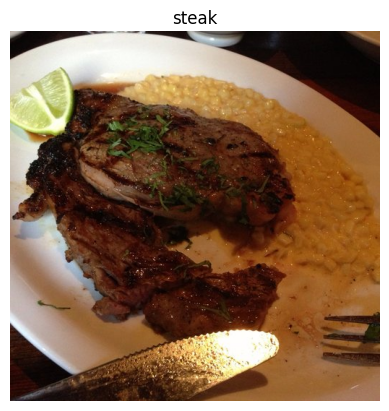

In [8]:
# view a random image
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class='steak')

In [9]:
# View the image shape
img.shape # return width, height, color channels

(512, 512, 3)

## end to end example

build a cnn to find patterns in images.
* load
* preprocess
* build a cnn, compile and fit

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

#processing, normalization
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from dir and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#build CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile CNN model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 15s 185ms/step - loss: 0.6364 - accuracy: 0.6447 - val_loss: 0.4867 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4732 - accuracy: 0.7813 - val_loss: 0.3672 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4017 - accuracy: 0.8200 - val_loss: 0.3734 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 7s 157ms/step - loss: 0.3940 - accuracy: 0.8133 - val_loss: 0.3575 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3292 - accuracy: 0.8687 - val_loss: 0.3634 - val_accuracy: 0.8420


In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Breaking down steps Binary classification

### 1. Become one with data

['2823872.jpg']
Image shape: (512, 512, 3)
['2044732.jpg']
Image shape: (512, 306, 3)


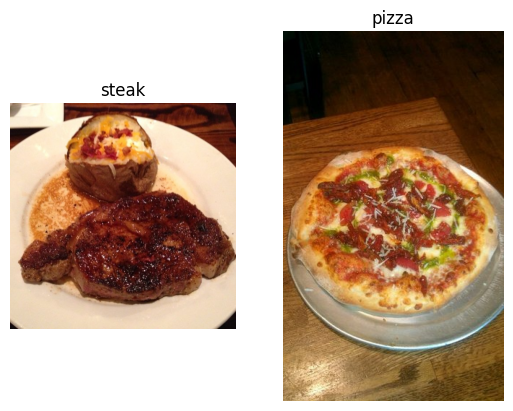

In [12]:
# Visual data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_image = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data

In [13]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

### Turning data into batches

*   Batch is smaller subset of data







In [14]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [15]:
# Load in our image data from directory
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
# get a sample of a training dataset
images, labels = train_data.next() #get next batch of images/labels
len(images),len(labels)

(32, 32)

In [17]:
#batches number
len(train_data)

47

In [18]:
# Get first two images

images[:2], images[0].shape

(array([[[[0.41960788, 0.24705884, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.3921569 , 0.21960786, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.4039216 , 0.23137257, 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38823533, 0.34901962, 0.3137255 ],
          [0.40784

In [19]:
# View the first batch of labels
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

### 3. Create a CNN model ( start with a baseline-> simple model to beat while improving )

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras import Sequential

In [21]:
# Baseline model
model_4 = Sequential([
    Conv2D(filters=10, #filter is the number of slideing windows going across an input
           kernel_size=3, #the size of sliding window going across an input
           strides=1, #the size of the step in sliding window takes across an input
           padding='valid', # if "same", output shape is same as input, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [22]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 152ms/step - loss: 1.1259 - accuracy: 0.6693 - val_loss: 0.4441 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 7s 156ms/step - loss: 0.4425 - accuracy: 0.8027 - val_loss: 0.3791 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.3177 - accuracy: 0.8753 - val_loss: 0.4618 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.1879 - accuracy: 0.9413 - val_loss: 0.3921 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 6s 118ms/step - loss: 0.0573 - accuracy: 0.9853 - val_loss: 0.5452 - val_accuracy: 0.8080


###  Evaluating our model

<Axes: >

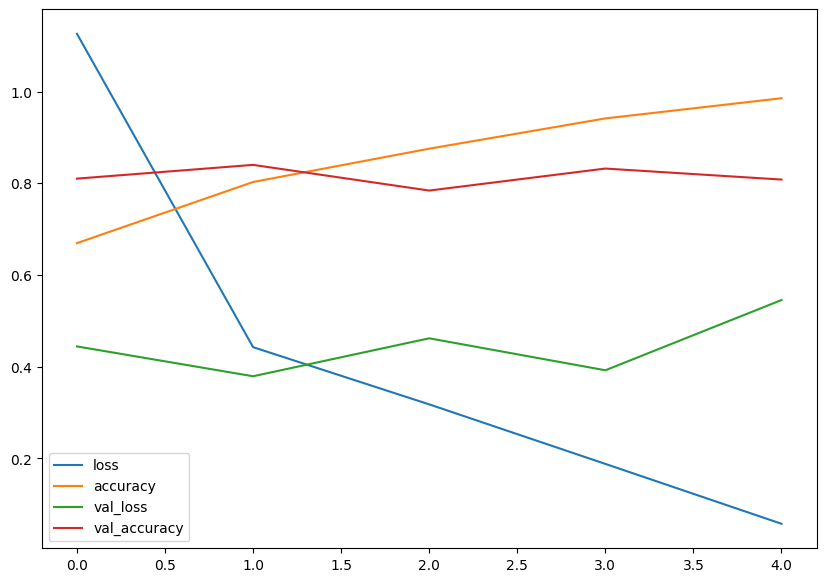

In [24]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [25]:
# Plot validation and training curves separately
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


when a model's validation loss starts to increase, it's likely that the model is overfitting on the training dataset. it's learning the patterns in the training dataset too well

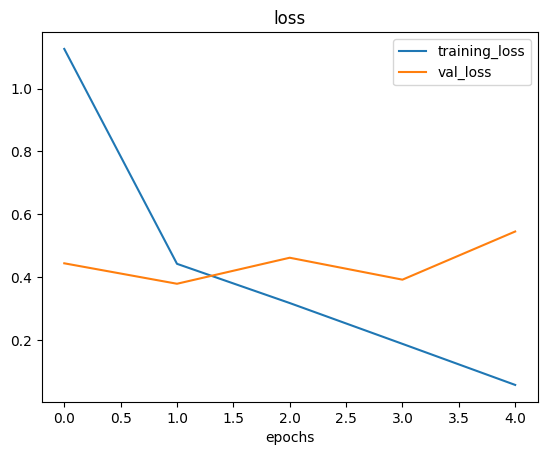

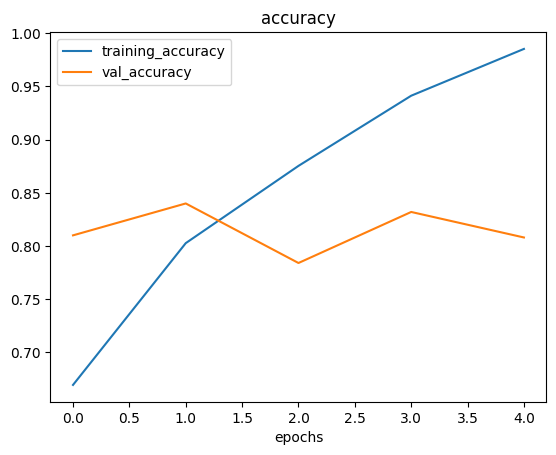

In [26]:
plot_loss_curves(history_4)

### Adjust the model parameters,

ways to induce overfitting:

* increase the number of conv layers
* Increase the number of conv filters
* add another dense layers to the output of our flatterned layers

ways to reduce overfitting:
* Add data augmentation
* Add regularization layers (such as Maxpool2D)
* Add more data

In [27]:
from tensorflow.keras.layers import MaxPool2D

In [28]:
# Create the model
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [29]:
#Compile
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 122ms/step - loss: 0.5947 - accuracy: 0.6987 - val_loss: 0.5286 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 6s 135ms/step - loss: 0.4988 - accuracy: 0.7673 - val_loss: 0.4543 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4677 - accuracy: 0.7913 - val_loss: 0.3882 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 5s 117ms/step - loss: 0.4342 - accuracy: 0.8113 - val_loss: 0.3686 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.4189 - accuracy: 0.8173 - val_loss: 0.3945 - val_accuracy: 0.8420


In [30]:
# Get a summary
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

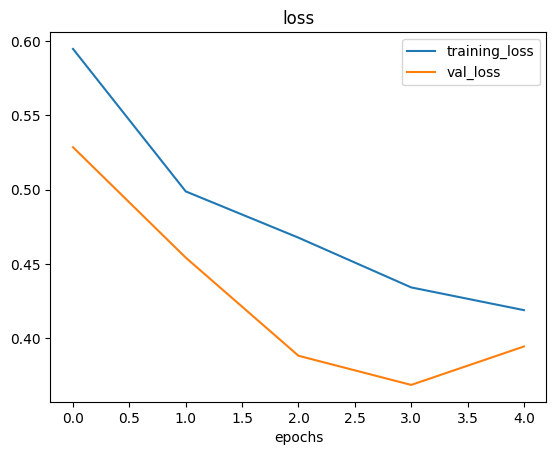

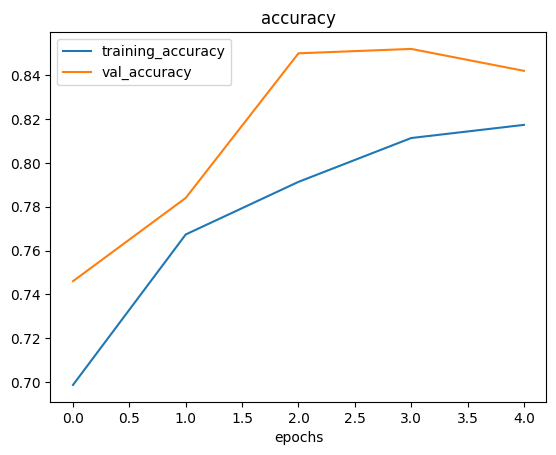

In [31]:
# plot loss curve
plot_loss_curves(history_5)

### Data augmentation

process of altering training data, leading it to more diversity and in turn allowing models to learn more generalizable paterrns

In [32]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, #image rotation
                                             shear_range=0.2,   # how much to shear
                                             zoom_range=0.2,
                                             width_shift_range=0.2, #move around on x-axis
                                             height_shift_range=0.2, # move around on y-axis
                                             horizontal_flip=True)

#without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#with data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [33]:
# visual data augmentation

print("augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)
# Create non-augmented data
print("non-augmented training data")

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
#Create non-augmented test data
print("non-augmented test data")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")

augmented training data
Found 1500 images belonging to 2 classes.
non-augmented training data
Found 1500 images belonging to 2 classes.
non-augmented test data
Found 500 images belonging to 2 classes.


Data Augmentation is usuallly performed on training data

In [34]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


(-0.5, 223.5, 223.5, -0.5)

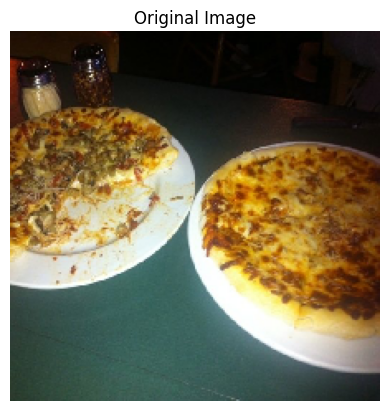

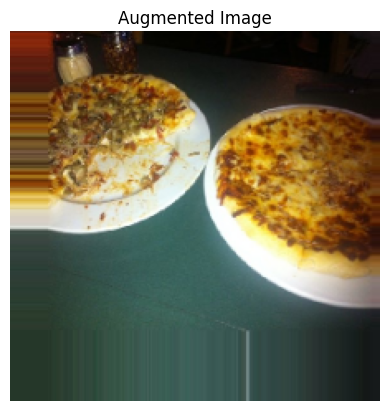

In [35]:
# show the image
import random
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [37]:
# Create a model same as model_5
model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#Compile
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 455ms/step - loss: 0.7301 - accuracy: 0.4793 - val_loss: 0.6832 - val_accuracy: 0.5240
Epoch 2/5
47/47 [==============================] - 23s 496ms/step - loss: 0.6843 - accuracy: 0.5220 - val_loss: 0.6630 - val_accuracy: 0.5980
Epoch 3/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6732 - accuracy: 0.5700 - val_loss: 0.6843 - val_accuracy: 0.5600
Epoch 4/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6777 - accuracy: 0.6127 - val_loss: 0.6363 - val_accuracy: 0.6920
Epoch 5/5
47/47 [==============================] - 21s 451ms/step - loss: 0.6389 - accuracy: 0.6433 - val_loss: 0.5278 - val_accuracy: 0.8100


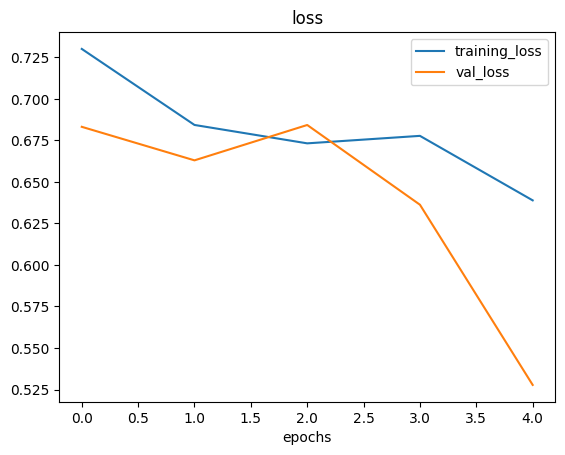

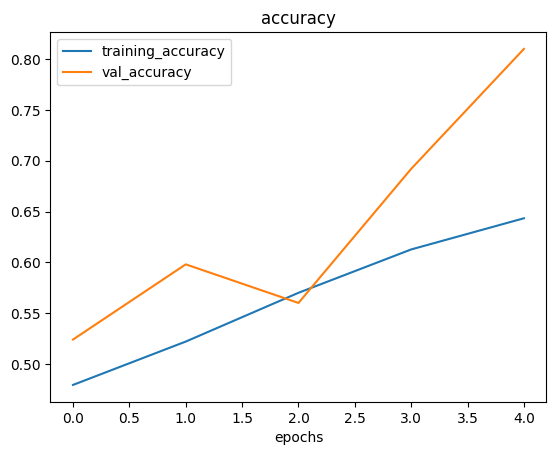

In [38]:
# Check models training curves
plot_loss_curves(history_6)

In [39]:
# Shuffle augmented training data
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [40]:
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#Compile
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data)

            )

Epoch 1/5
47/47 [==============================] - 22s 442ms/step - loss: 0.6692 - accuracy: 0.5867 - val_loss: 0.5257 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 21s 456ms/step - loss: 0.5588 - accuracy: 0.7307 - val_loss: 0.4449 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 30s 648ms/step - loss: 0.5414 - accuracy: 0.7353 - val_loss: 0.4164 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 20s 419ms/step - loss: 0.5360 - accuracy: 0.7393 - val_loss: 0.3844 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 21s 450ms/step - loss: 0.5293 - accuracy: 0.7467 - val_loss: 0.4048 - val_accuracy: 0.8360


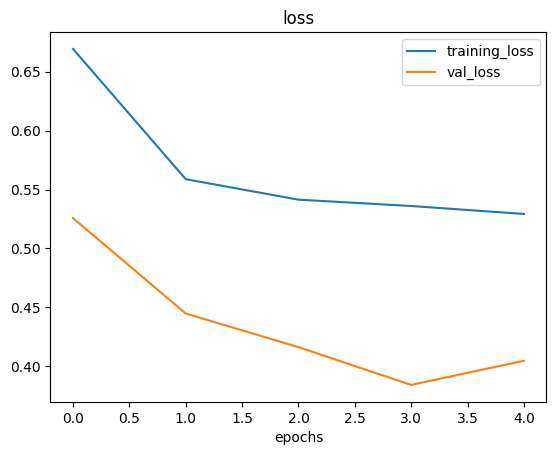

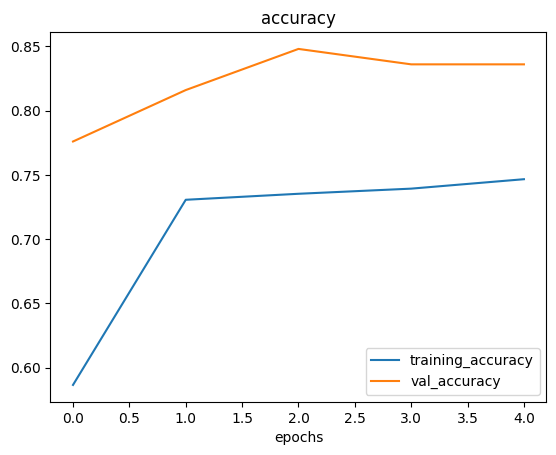

In [41]:
plot_loss_curves(history_7)

#### Model improvement

* increase number of layers
* increase the number of filters(10 to 32 or 64)
* train for longer
* learning rate
* get more data
* use **transfer learning**

### Helper function to import and reshape the custom image

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  #Decode the read file to a tensor
  img = tf.image.decode_image(img)
  #resize
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #rescale
  img =img/255.

  return img

In [ ]:
# index the predicted class by round the prediction probability
pred_class = class_name[int(tf.round(pred))]
pred_class

In [ ]:
def pred_and_plot(model, filename, class_name=class_names):
  #import the target image and preprocess it
  img = load_and_pred_image(filename)

  #make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #Plot
  plt.imshow(img)
  plt.title(f"prediction: {class_names}")
  plt.axis(False)